In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows', 200)

In [2]:
#readind dataset
df=pd.read_csv("loan.csv",low_memory=False)

In [3]:
#viewing dataset
df.head(15)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
#shape
df.shape

(39717, 111)

### Data Cleansing

In [5]:
#missing or null values in dataset
null_count=(df.isnull().sum())
null_count

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
# finding null %
null_perc=(100*null_count/len(df.index))
# rounding value
null_perc=round(null_perc,2)
null_perc

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [7]:
#Printing values having more than 0% misisng values
null_perc[null_perc>0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [8]:
#removing col having >30% null values
df.drop(null_perc[null_perc>30].index, axis=1, inplace=True)

In [9]:
#viewing unique values 
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

we can drop the column values with 1 unique values

In [10]:
#dropping col with one unique values
df.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'], axis=1,inplace=True)

In [11]:
#printing unique value
df.nunique().sort_values(ascending=False)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
total_acc                     82
issue_d                       55
addr_state

In [12]:
#taking high unique values 
df.nunique().sort_values(ascending=False).head(15)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
total_rec_prncp     7976
annual_inc          5318
recoveries          4040
dtype: int64

In [13]:
df.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal           

Dropping some text values which have text values in data set

In [14]:
df.drop(['emp_title','title'],axis=1,inplace=True)

Dropping url and member id

In [15]:
df.drop(['url','member_id'],axis=1,inplace=True)

dropping --->out_prncp,out_prncp_inv,out_prncp_inv,total_rec_prncp,total_rec_late_fee,
recoveries,collection_recovery_fee,last_credit_pull_d,last_pymnt_d,
out_prncp,out_prncp_inv 

In [16]:
df.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'out_prncp',  'out_prncp_inv', 'last_pymnt_d'], axis=1, inplace=True)

since we are only interested in loan dropping recoveries & collection_recovery_fee

In [17]:
df.drop(['collection_recovery_fee','recoveries'],axis=1,inplace=True)

In [18]:
#% of null or misisng values
null_perc = round(100*(df.isnull().sum()/len(df.index)),2)
null_perc[null_perc>0]

emp_length              2.71
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

In [19]:
#removing null value rows emp_length,revol_util,pub_rec_bankruptcies
df.dropna(subset=['emp_length','revol_util','pub_rec_bankruptcies'],inplace=True)

In [20]:
null_perc = round(100*(df.isnull().sum()/len(df.index)),2)
null_perc[null_perc>0]

Series([], dtype: float64)

In [21]:
df['emp_length'] = df['emp_length'].str.rstrip('years ')
df['emp_length'][df['emp_length'] == '< 1'] = '0.5'
df['emp_length'].replace({'10+': '10'}, inplace=True)

removing current values in loan status bcs w need only fully paid and charged off

In [22]:
df=df[df.loan_status != 'Current']

In [23]:
#checking unique values from term column
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [24]:
df['term'] = df.term.str.strip()
df.term.unique()

array(['36 months', '60 months'], dtype=object)

In [25]:
df.shape

(36800, 31)

### Converting Data Type 

In [26]:
df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

int_rate and revol_util are having % symbol  lets remove it 

In [27]:
#removing % values
#f['int_rate'] = df.int_rate.replace('%','').astype(float)
#f['revol_util'] = df.int_rate.replace('%','').astype(float)

df['int_rate'] = df.int_rate.replace('%','', regex=True).astype(float)
df['revol_util'] = df.int_rate.replace('%','',regex=True).astype(float)

converting data-type to dates

In [28]:
df['issue_d']=pd.to_datetime(df.issue_d,format="%b-%y")
df['issue_d'] = df['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2021 else x)

In [29]:
#df['issue_d'].value_counts().sort_index().plot(kind='bar')


In [30]:
df['earliest_cr_line'] = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [31]:
#df['earliest_cr_line'].value_counts().sort_index().plot(kind='bar')

In [32]:
df.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

In [33]:
#Seperating date-month-year as derived variables

In [34]:
#deriving week
df['issued_d_year']=df.issue_d.dt.year
#deriving month
df['issued_d_month']=df.issue_d.dt.strftime('%b')
#deriving day
df['issue_d_day']=df.issue_d.dt.weekday

df['earliest_cr_line_year']=df.issue_d.dt.year
df['earliest_cr_line_month']=df.issue_d.dt.strftime('%b')
df['earliest_cr_line_day']=df.issue_d.dt.weekday

In [35]:
#converting date as object data type
df['issued_d_year']=df['issued_d_year'].astype(object)
df['issued_d_month']=df['issued_d_month'].astype(object)
df['issue_d_day']=df['issue_d_day'].astype(object)
df['earliest_cr_line_year']=df['earliest_cr_line_year'].astype(object)
df['earliest_cr_line_month']=df['earliest_cr_line_month'].astype(object)
df['earliest_cr_line_day']=df['earliest_cr_line_day'].astype(object)

In [36]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issued_d_year,issued_d_month,issue_d_day,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_day
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,10.65,9,5863.155187,5833.84,171.62,0.0,2011,Dec,3,2011,Dec,3
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,15.27,4,1008.710000,1008.71,119.66,0.0,2011,Dec,3,2011,Dec,3
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,15.96,10,3005.666844,3005.67,649.91,0.0,2011,Dec,3,2011,Dec,3
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,13.49,37,12231.890000,12231.89,357.48,0.0,2011,Dec,3,2011,Dec,3
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,7.90,12,5632.210000,5632.21,161.03,0.0,2011,Dec,3,2011,Dec,3


Adding approved loan 

Approved loan = (funded_amount_by+invester*100/ loan_amount)

In [37]:
df['approved_loan_ratio']= (df.funded_amnt_inv*100)/(df.loan_amnt)

In [38]:
df['approved_loan_ratio'].head(25)

0      99.500000
1     100.000000
2     100.000000
3     100.000000
5     100.000000
6     100.000000
7     100.000000
8     100.000000
9      99.534884
10    100.000000
11    100.000000
12    100.000000
13    100.000000
14    100.000000
15    100.000000
16    100.000000
17    100.000000
18    100.000000
19    100.000000
20     94.529191
21    100.000000
22    100.000000
23    100.000000
24    100.000000
25    100.000000
Name: approved_loan_ratio, dtype: float64

In [39]:
df['approved_loan_ratio']=round(df['approved_loan_ratio'],2)

In [40]:
#df['approved_loan_ratio']

In [41]:
df.dtypes

id                                 int64
loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
zip_code                          object
addr_state                        object
dti                              float64
delinq_2yrs                        int64
earliest_cr_line          datetime64[ns]
inq_last_6mths                     int64
open_acc                           int64
pub_rec                            int64
revol_bal       

Data cleansing part is done, now lets do univariate and multivariate analysis

# 1.Univariate Analysis

a.Loan Amount

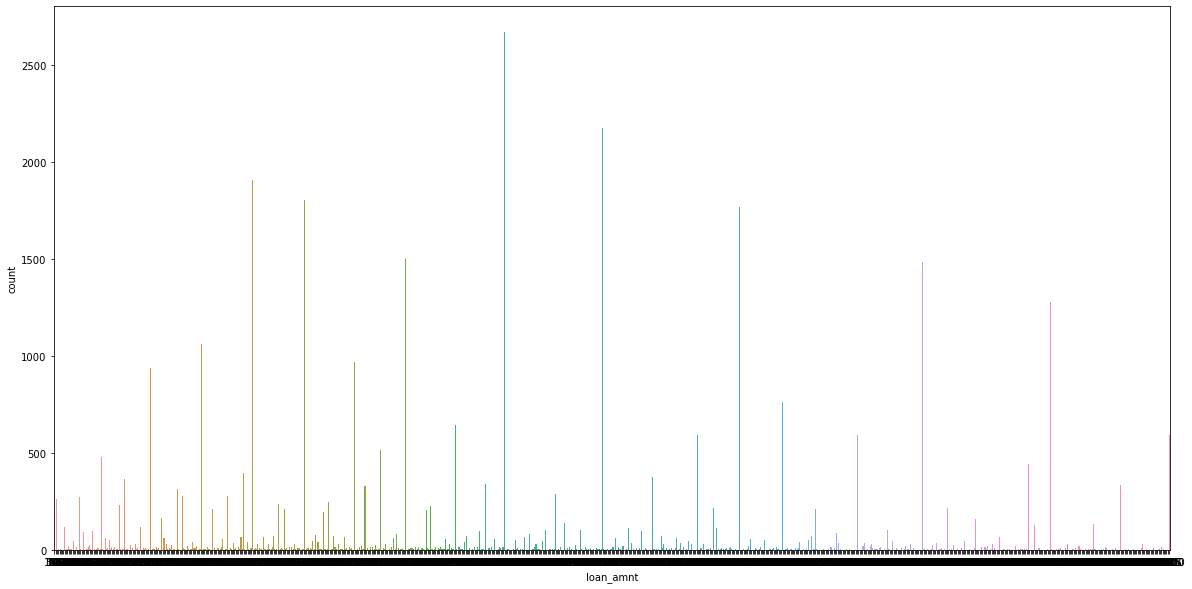

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['loan_amnt'],data=df)
plt.show()

b.Loan Status

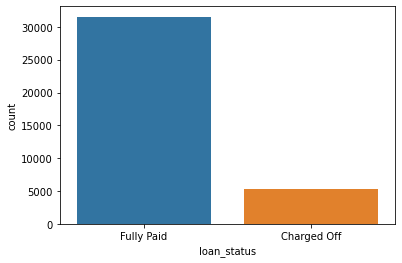

In [43]:
sns.countplot(x=df['loan_status'])
plt.show()

c.Grade

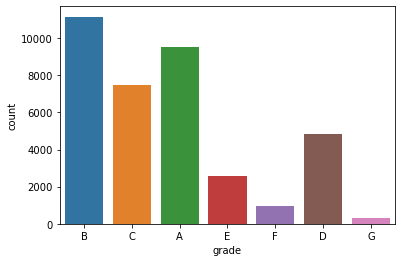

In [44]:
sns.countplot(x=df['grade'],data=df)
plt.show()

d.Employee working experience

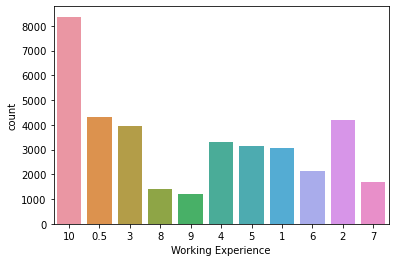

In [45]:
sns.countplot(x=df['emp_length'],data=df)
plt.xlabel('Working Experience')
plt.show()

e.Funded Amount by Investor

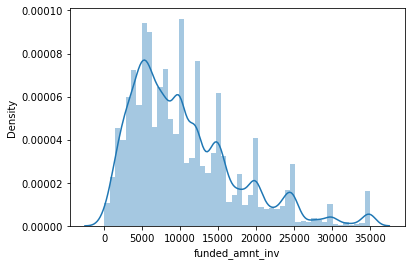

In [47]:
sns.distplot(df['funded_amnt_inv'])
plt.show()

In [48]:
df['funded_amnt_inv'].describe()

count    36800.000000
mean     10439.055845
std       7008.522880
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14350.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

f.Loan amount

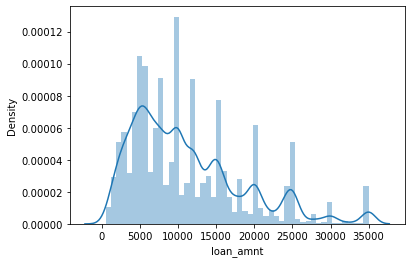

In [49]:
sns.distplot(df['loan_amnt'])
plt.show()

g.Annual Income of the employee

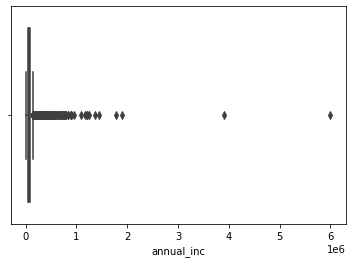

In [50]:
#reviwing salary

sns.boxplot(x=df['annual_inc'])
plt.show()

h.Approved Loan Ratio

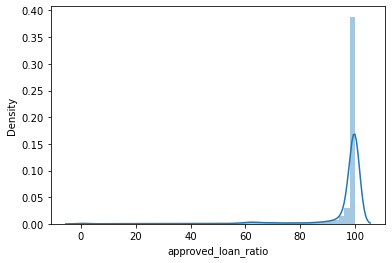

In [51]:
sns.distplot(a=df['approved_loan_ratio'])
plt.show()

1.It is observed that the loan amount varies from 0 to 30,000

2.Mean = 10,000

3.Most of the loans are fully paid

4.Most of the loans are grade A & B

5.Human having more than 10 years experience apply loan in majority

6.Funded amount by investor is right skewed, hence most of the loan amount is greater than 3.5Lakhs

7.From the above plot it is visible that only 2 Humans are getting higher salary greater than 3L

8.70% of people get sure loan from investers

## 2.Multivariate Analysis

a.Employee Length va Loan Status

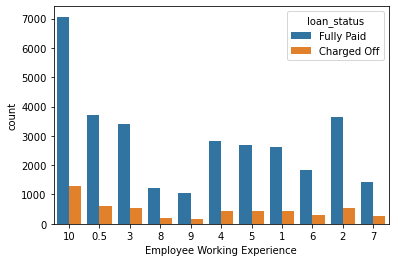

In [52]:
sns.countplot(x=df['emp_length'], hue=df['loan_status'], data=df)
plt.xlabel('Employee Working Experience')
plt.show()

b.Loan Amount va Funded amount by Investors

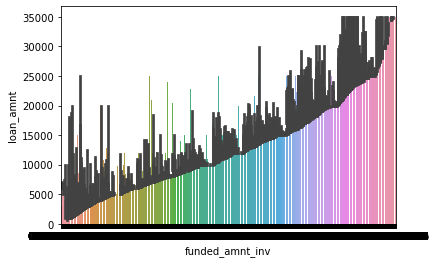

In [53]:
sns.barplot(x=df['funded_amnt_inv'],y=df['loan_amnt'],data=df)
plt.show()

c.Loan Amount vs Loan Status

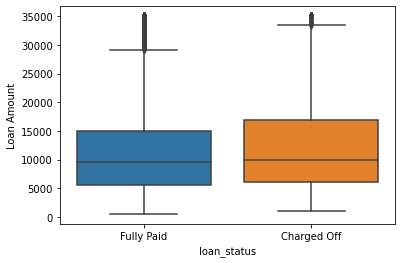

In [53]:
sns.boxplot( y=df["loan_amnt"], x=df['loan_status'] , data=df)
plt.ylabel('Loan Amount')
plt.show()

d.LoanPurpose vs LoanStatus

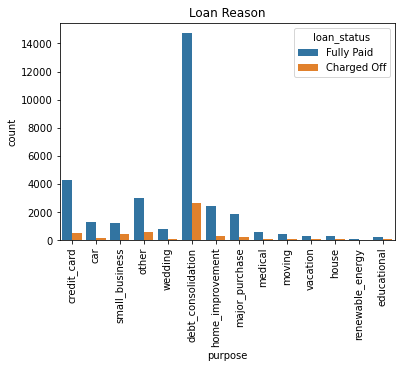

In [54]:
sns.countplot(x=df['purpose'], hue=df['loan_status'], data=df)
plt.title('Loan Reason')
plt.xticks(rotation=90)
plt.show()

e.Term vs Purpose

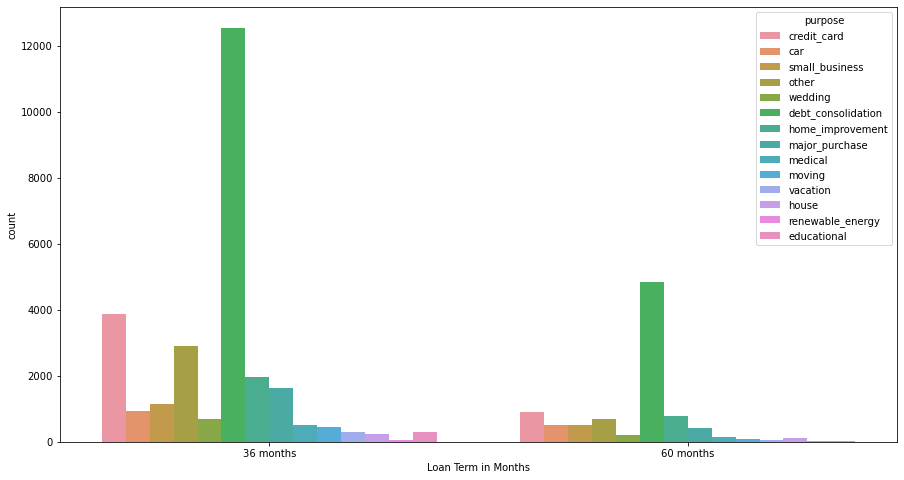

In [55]:
plt.figure(figsize=(15,8))
sns.countplot( x=df['term'], hue=df['purpose'], data=df)
plt.xlabel('Loan Term in Months')
plt.show()

f.Interest Rate vs Annual Income

<AxesSubplot:xlabel='int_rate', ylabel='annual_inc'>

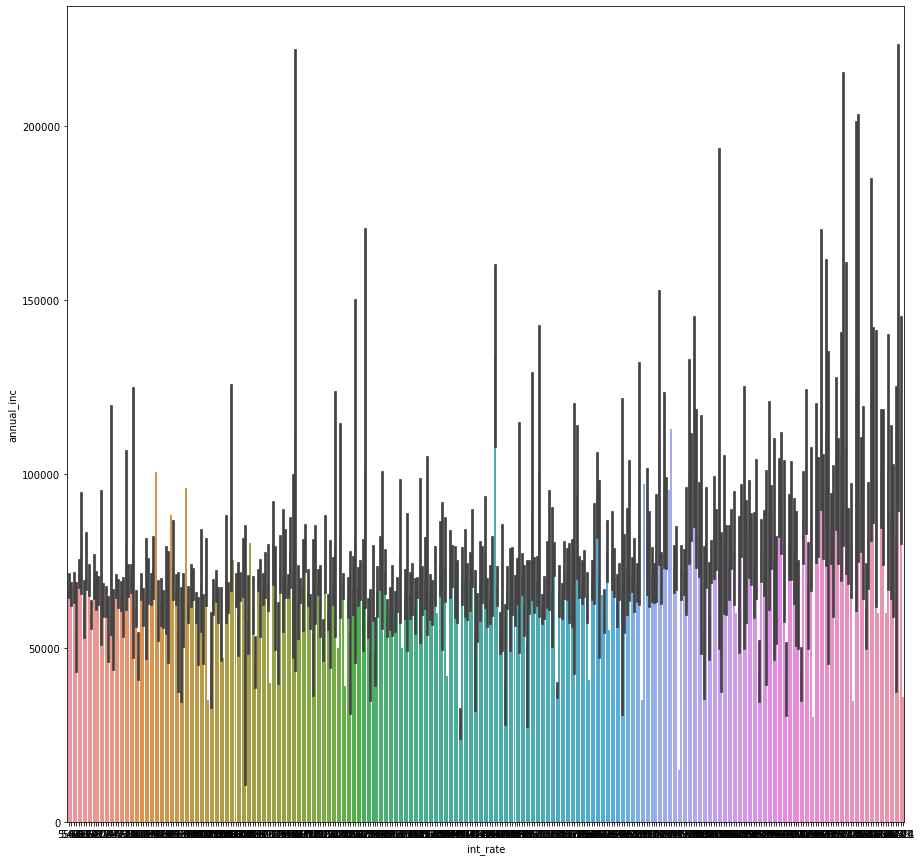

In [58]:
plt.figure(figsize=(15,15))
sns.barplot(x=df['int_rate'],y=df['annual_inc'])

g.Loan Amount vs Purpose

<AxesSubplot:xlabel='loan_amnt', ylabel='purpose'>

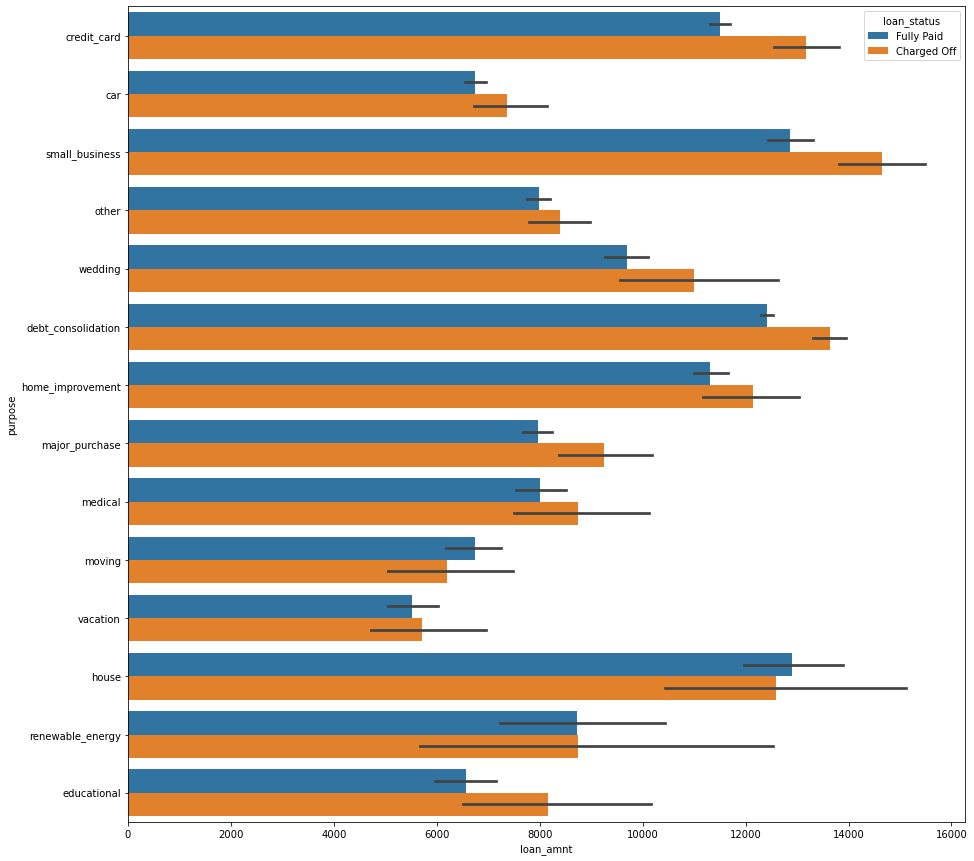

In [58]:
plt.figure(figsize=(15,15))
sns.barplot(x=df['loan_amnt'],y=df['purpose'],hue=df['loan_status'])

Maximum staus of the loan were Fully paid

h.Grade vs Installment Rate

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

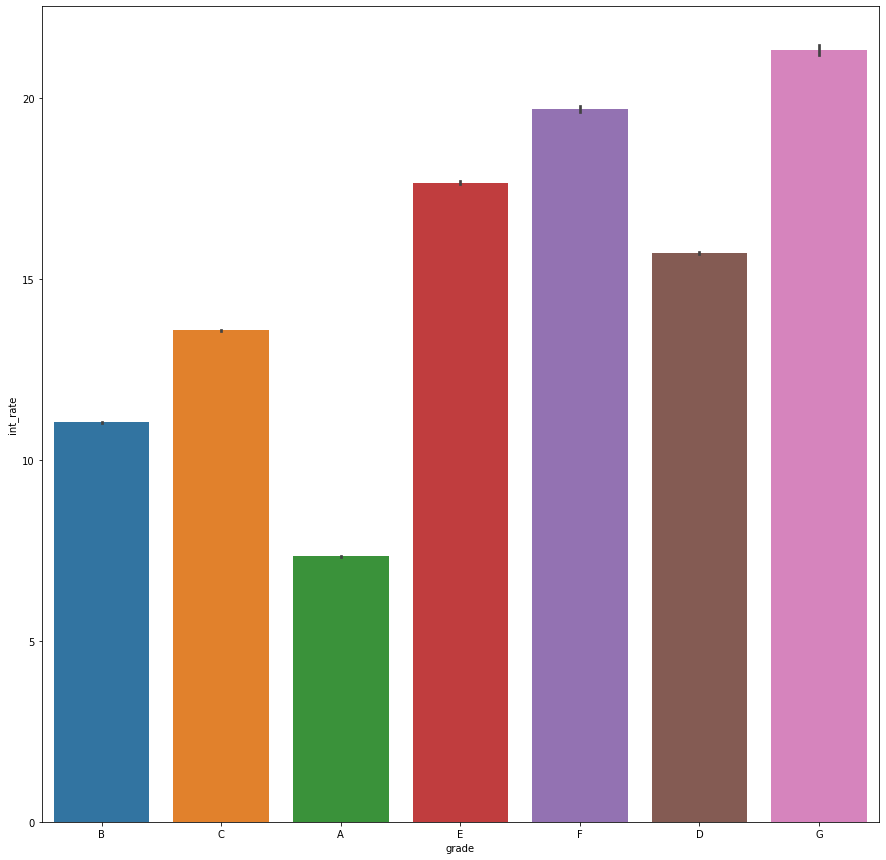

In [59]:
plt.figure(figsize=(15,15))
sns.barplot(x=df['grade'],y=df['int_rate'])

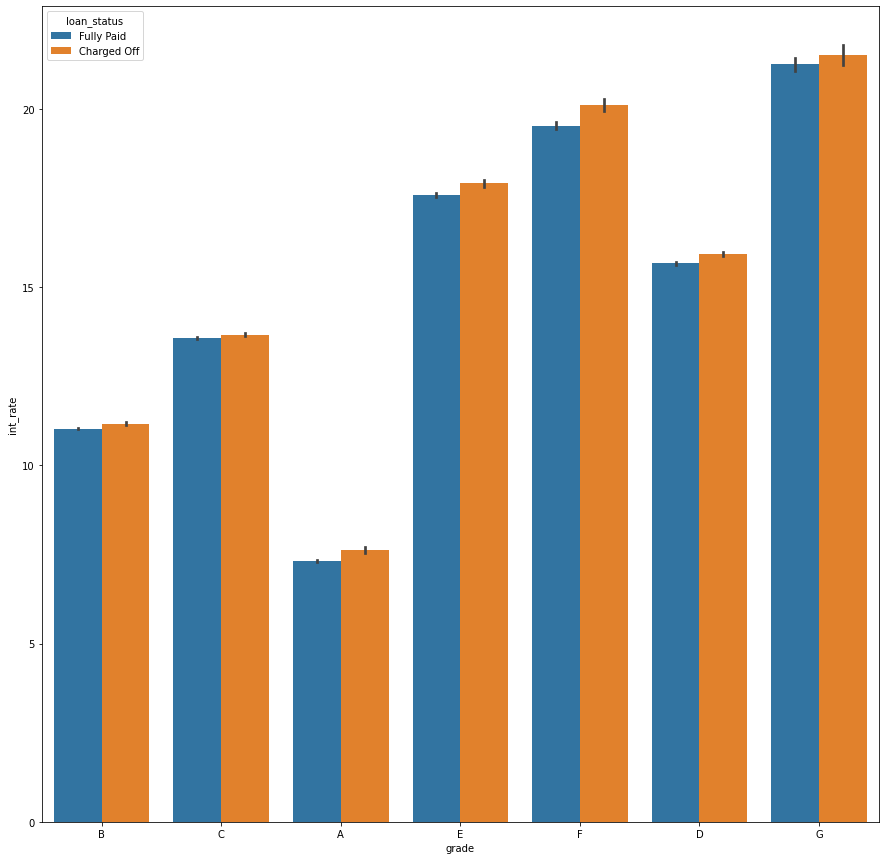

In [60]:
plt.figure(figsize=(15,15))
sns.barplot(x=df['grade'], y=df['int_rate'], hue ='loan_status',data =df)
plt.show()

i.Loan Amount vs HouseOwnerShip

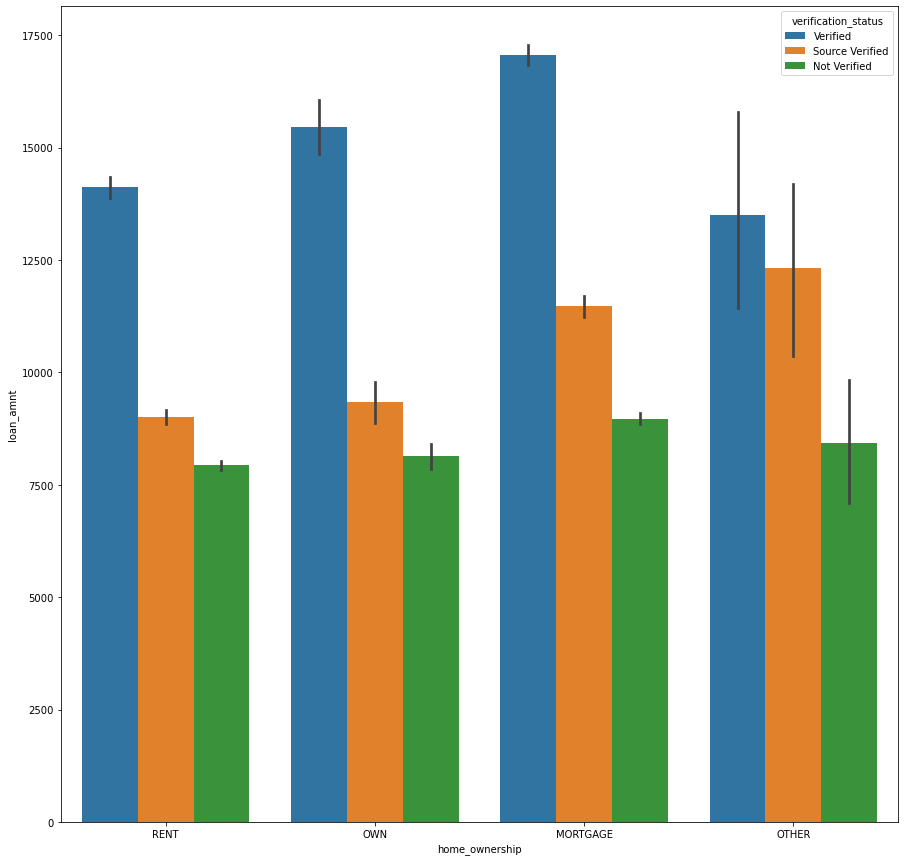

In [61]:
plt.figure(figsize=(15,15))
sns.barplot(x=df['home_ownership'], y=df['loan_amnt'],hue=df['verification_status'],data =df)
plt.show()

j.LoanAmount vs TotalPayment

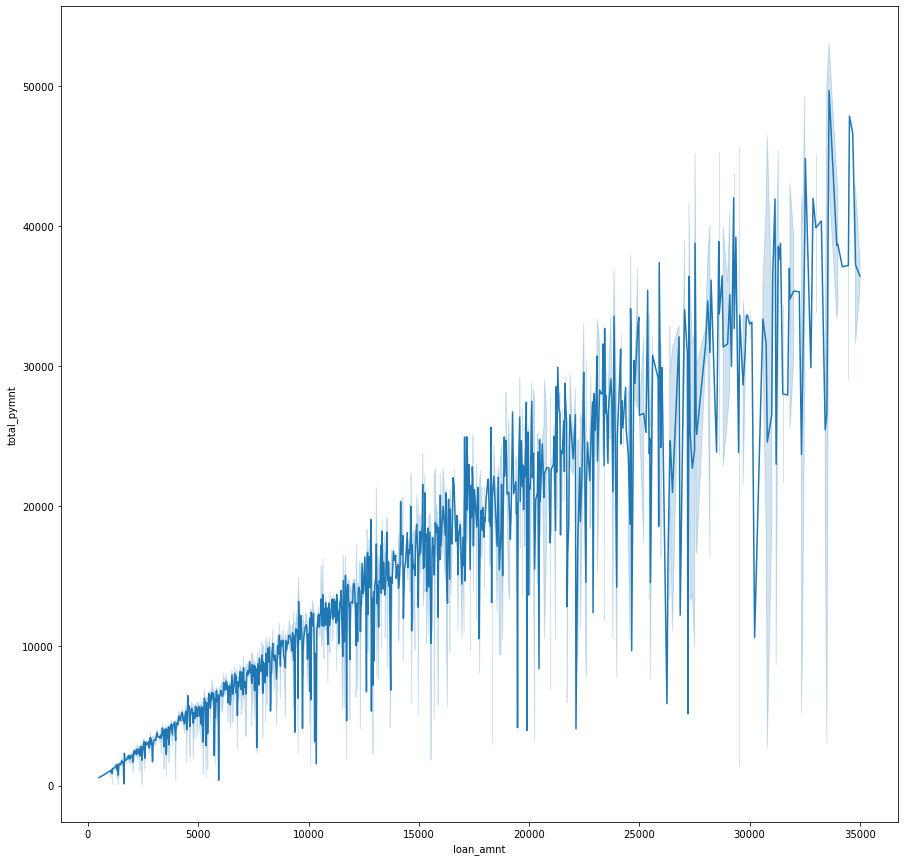

In [62]:
plt.figure(figsize=(15,15))
sns.lineplot(x=df['loan_amnt'], y=df['total_pymnt'],data =df)
plt.show()

k.LoanAmount vss IssuedMonth

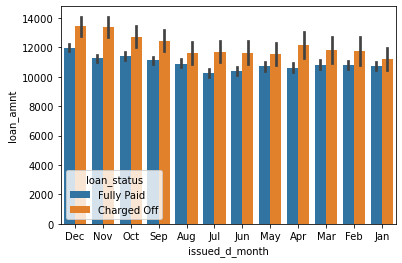

In [70]:
sns.barplot(x=df['issued_d_month'],y=df['loan_amnt'],hue=df['loan_status'])
plt.show()

l.IssuedYear vs LoanAmount

<AxesSubplot:xlabel='issued_d_year', ylabel='loan_amnt'>

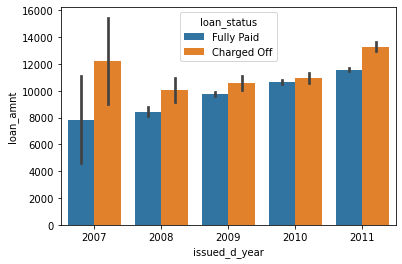

In [69]:
sns.barplot(x=df['issued_d_year'],y=df['loan_amnt'],hue=df['loan_status'])

M.HouseOwnerShip vs AnnualIncome

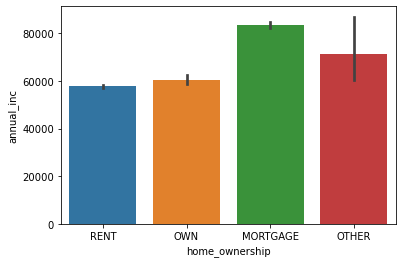

In [57]:
sns.barplot(x=df['home_ownership'],y=df['annual_inc'])
plt.show()

1.Human's having experince of 10 paid their loan sucessfully when comapred with others,where as 8,9 are not paying theri loan well

2.From the above plot it is observed that mean, 25% and 75% Loan amount of Fully paid and charged off is similiar

3.Major human takes loan for the dept consolidation and taken loan is fully paid

4.Human choosing 36 Months tenure have high chance of paying correctly

5.People having Good annual income paying better Installments

6.Maximum stauts of the loan were Fully paid 

7.People having Home ownership as 'MORTAGE' have income of about 60K

8.The F grade Loan applier having loan amount of 15k-20k

9.G grade Loan applier having interest rate above 20%